# FSC curve of empiar10311_stack_crop.mrc VS several sigma values in Gaussian Denoising

In [1]:
import mrcfile # pip install mrcfile
import matplotlib.pyplot as plt # pip install matplotlib
from self_fourier_shell_correlation import fsc_utils as fsc # pip install --upgrade --force-reinstall "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"
from denoising.volume.gaussian import Monochrome_Denoising as GD # pip install --upgrade --force-reinstall "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
from denoising.utils import get_gaussian_kernel # pip install --upgrade --force-reinstall "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
import denoising.utils as utils # pip install --upgrade --force-reinstall "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
import numpy as np
import logging

In [2]:
vol_name = "empiar10311_stack_crop"
vol_extension = ".mrc"
vols_path = "/shared/vols/"

In [3]:
from collections import namedtuple # Comes with the PSL
Args = namedtuple("args", ["vol"])
args = Args(vols_path + vol_name + vol_extension)

In [4]:
with mrcfile.open(args.vol, permissive=True) as mrc:
    vol= mrc.data

In [5]:
vol.shape

(100, 1024, 1024)

In [6]:
vol = vol[0:100, 0:100, 0:100]

In [7]:
#Z_dim = vol.shape[0]
#Z2 = Z_dim//2
#plt.imshow(vol[Z2], cmap="gray")

In [8]:
def get_kernel_coeffs(sigma):
    sigmas = np.array([sigma, sigma, sigma])
    kernel = [None]*3
    kernel[0] = get_gaussian_kernel(sigmas[0])
    kernel[1] = get_gaussian_kernel(sigmas[1])
    kernel[2] = get_gaussian_kernel(sigmas[2])
    return kernel

In [9]:
logging.basicConfig(format="[%(filename)s:%(lineno)s %(funcName)s()] %(message)s")
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
denoiser = GD(logger)

In [10]:
curve = []
sigmas = [0.1, 0.5, 0.6, 0.75, 1.0, 1.5, 2.0, 3.0]
for i in sigmas:
    total_c_avg = 0
    kernel = get_kernel_coeffs(i)
    denoised_vol = denoiser.filter(vol, kernel)
    freq, c_avg = fsc.get_FSC_curve(vol, denoised_vol)
    #print(freq.shape, c_avg.shape)
    curve.append(c_avg)
    print(i, end=' ')

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.1 

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.5 

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.6 

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.75 

[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
1.0 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
1.5 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
2.0 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


compute_fourier_shell_correlation.shape=(100, 100, 100)
3.0 

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_167322/3216322376.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.title("GD(" + vol_name + ", $\sigma$)")
/tmp/ipykernel_167322/3216322376.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, curve[i], label=f"$\sigma$={sigmas[i]}")


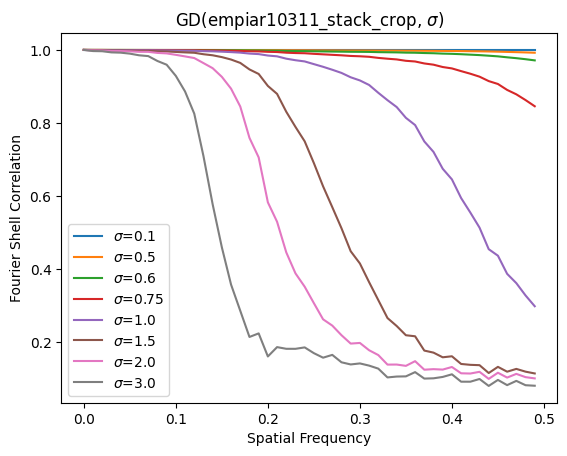

In [11]:
plt.title("GD(" + vol_name + ", $\sigma$)")
plt.xlabel("Spatial Frequency")
plt.ylabel("Fourier Shell Correlation")
for i in range(len(sigmas)):
    plt.plot(freq, curve[i], label=f"$\sigma$={sigmas[i]}")
plt.legend()
plt.savefig(vol_name + "_GD__VS__FSC" + ".svg")
plt.show()

In [12]:
curve = []
sigmas = [0.1, 0.5, 0.6, 0.75, 1.0, 1.5, 2.0]
for i in sigmas:
    total_c_avg = 0
    kernel = get_kernel_coeffs(i)
    denoised_vol = denoiser.filter(vol, kernel)
    freq, c_avg = fsc.get_SFSC_curve(denoised_vol)
    curve.append(c_avg)
    print(i, end=' ')

[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
0.1 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
0.5 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
0.6 

[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
0.75 

[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
1.0 

[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9285430908203


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
1.5 

[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


compute_fourier_shell_correlation.shape=(100, 100, 50)
compute_fourier_shell_correlation.shape=(100, 50, 100)
compute_fourier_shell_correlation.shape=(50, 100, 100)
2.0 

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_167322/2575000573.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.title("GD(" + vol_name + ", $\sigma$)")
/tmp/ipykernel_167322/2575000573.py:6: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, curve[i], label=f"$\sigma$={sigmas[i]}", marker=markers[i % len(markers)])


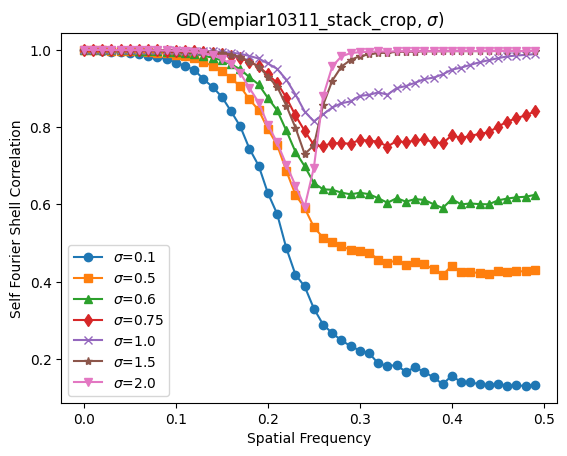

In [13]:
plt.title("GD(" + vol_name + ", $\sigma$)")
plt.xlabel("Spatial Frequency")
plt.ylabel("Self Fourier Shell Correlation")
markers = ['o', 's', '^', 'd', 'x', '*', 'v', 'p', 'h', '+']  # Add more markers if needed
for i in range(len(sigmas)):
    plt.plot(freq, curve[i], label=f"$\sigma$={sigmas[i]}", marker=markers[i % len(markers)])
plt.legend()
plt.savefig(vol_name + "_GD__VS__SFSC" + ".svg")
plt.show()

## Why the SFSC curves go up with the frequency?

In [14]:
np.max(vol)

np.float32(255.0)

In [15]:
curve = []
sigmas = [0.1, 0.5, 0.6, 0.75, 1.0, 1.5, 2.0, 3.0]
for i in sigmas:
    total_c_avg = 0
    noise_1 = utils.gaussian_noise(vol.shape, sigma=100)
    noise_2 = utils.gaussian_noise(vol.shape, sigma=100)
    noisy_vol_1 = vol + noise_1
    noisy_vol_2 = vol + noise_2
    kernel = get_kernel_coeffs(i)
    denoised_vol_1 = denoiser.filter(noisy_vol_1, kernel)
    denoised_vol_2 = denoiser.filter(noisy_vol_2, kernel)
    freq, c_avg = fsc.get_FSC_curve(denoised_vol_1, denoised_vol_2)
    #print(freq.shape, c_avg.shape)
    curve.append(c_avg)
    print(i, end=' ')

[gaussian.py:99 filter()] mean=164.01332595955452
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.96053139023113
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=164.0003226210543
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.1 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=164.0097833145698
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.93711998803926
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.5 

[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.98448806646232
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.94007695450998
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.6 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9427191978097
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.946288933077
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
0.75 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.91535804484445
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.9622471640633


compute_fourier_shell_correlation.shape=(100, 100, 100)
1.0 

[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.86438877464022
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.85307774404055
[gaussian.py:101 filter()] filtered along Z


compute_fourier_shell_correlation.shape=(100, 100, 100)
1.5 

[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.85195657460793
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=164.0540520088965


compute_fourier_shell_correlation.shape=(100, 100, 100)
2.0 

[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X
[gaussian.py:99 filter()] mean=163.8168343035302
[gaussian.py:101 filter()] filtered along Z
[gaussian.py:103 filter()] filtered along Y
[gaussian.py:105 filter()] filtered along X


compute_fourier_shell_correlation.shape=(100, 100, 100)
3.0 

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_167322/1529147422.py:1: SyntaxWarning: invalid escape sequence '\s'
  plt.title("GD(" + vol_name + ", $\sigma$)")
/tmp/ipykernel_167322/1529147422.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(freq, curve[i], label=f"$\sigma$={sigmas[i]}")


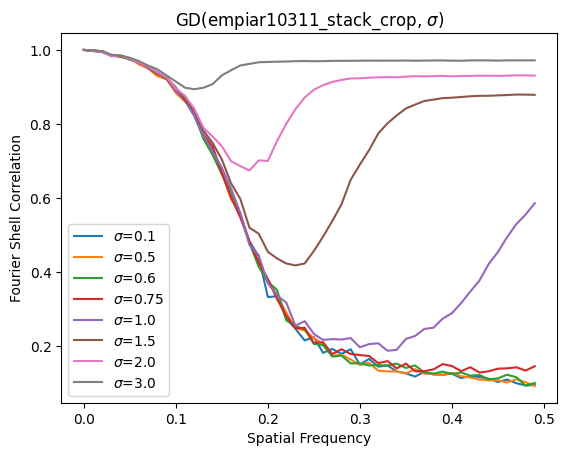

In [16]:
plt.title("GD(" + vol_name + ", $\sigma$)")
plt.xlabel("Spatial Frequency")
plt.ylabel("Fourier Shell Correlation")
for i in range(len(sigmas)):
    plt.plot(freq, curve[i], label=f"$\sigma$={sigmas[i]}")
plt.legend()
plt.savefig(vol_name + "_GD__VS__SFSC" + ".svg")
plt.show()

FSC has the same behaviour